In [187]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [188]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        # single layer neural network, so MLP is a misnomer
        self.layer = nn.Linear(self.input_dim, self.output_dim, bias=False)
    
    def forward(self, data):
        out = self.layer(data)
        return out

In [189]:
data = pd.read_csv('data-with-stats.csv', dtype=str)
data

,Do you want to be in society?,Do you make an attempt to socialise?,Do you consume things to alter your perspective? (Alcohol and stuff),Are you depressed?,Do you try to improve yourself?,Would you compromise with a friend?,If you and another person were both thirsty and you only had enough water for one person; would you share with the other person?,If a colleague invited you to do something with them; how would you answer? (Date; hang-out; party; etc.),Are you anxious of social interaction?,Do you think you fit in with other people?,...,Are you physically in-shape?,What is your biological sex?,How tall are you?,How attractive are you (from 0 to 10),What is your BMI?,How many friends and colleagues do you currently have?,Rate your life right now.,Which climate do you live in?,X,Y
0,Y,Y,Y,0,0,A,N,Y,0,A,...,N,othersex,11,23,34,43,53,polar,-3,2.25
1,D,A,0,A,A,D,Y,Y,0,0,...,Y,male,12,23,32,41,54,tropical,-1,4
2,D,0,Y,N,Y,Y,Y,Y,N,N,...,N,othersex,14,23,33,41,53,mild,-2,0.75
3,A,A,D,D,Y,N,N,N,A,N,...,Y,female,12,21,32,41,52,dry,-0.5,1.5
4,0,Y,Y,D,Y,0,Y,N,0,Y,...,D,female,14,22,32,41,52,snow,-3.5,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,A,A,0,Y,N,Y,Y,Y,0,...,0,female,15,24,31,43,54,dry,-0.5,3.5
196,Y,N,A,N,0,0,Y,Y,D,N,...,A,female,15,21,32,42,53,mild,-2.5,0.75
197,A,D,Y,N,D,N,N,N,0,0,...,0,female,11,22,32,42,51,tropical,0.5,-3.25
198,Y,A,Y,D,Y,N,Y,N,Y,A,...,D,female,12,23,31,42,52,tropical,0.5,3


In [190]:
results = data.values[:,-2:].astype(float)
results

array([[-3.  ,  2.25],
       [-1.  ,  4.  ],
       [-2.  ,  0.75],
       [-0.5 ,  1.5 ],
       [-3.5 , -2.  ],
       [-5.5 , -2.  ],
       [-7.  ,  2.25],
       [-3.5 , -2.  ],
       [-3.  ,  3.25],
       [ 0.5 ,  6.  ],
       [-2.  , -3.  ],
       [-5.  ,  0.75],
       [-6.  ,  3.5 ],
       [-2.  , -4.5 ],
       [-2.  ,  2.25],
       [-2.  ,  2.25],
       [-2.5 , -3.25],
       [ 3.  ,  0.75],
       [-6.  , -4.25],
       [-5.  ,  3.  ],
       [ 2.5 ,  2.25],
       [-3.  ,  0.5 ],
       [ 4.5 ,  2.5 ],
       [-1.  , -1.5 ],
       [-7.  , -2.25],
       [-2.  , -2.  ],
       [-2.  , -2.75],
       [-2.  ,  2.25],
       [-2.  , -1.5 ],
       [-4.  ,  0.  ],
       [ 0.  , -0.25],
       [-6.  ,  0.  ],
       [-1.  , -2.75],
       [ 3.  , -0.5 ],
       [-4.5 ,  0.5 ],
       [-4.  ,  4.25],
       [-2.  ,  0.75],
       [-3.  , -0.25],
       [ 1.  ,  2.5 ],
       [ 0.  , -4.5 ],
       [ 0.5 ,  5.25],
       [ 3.  ,  0.5 ],
       [-2.  , -3.25],
       [-5.

In [191]:
# one-hot encode the categorical data
answers = pd.get_dummies(data[data.columns[:-2]])
answers

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
196,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
197,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
198,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


/home/nathanielbd/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


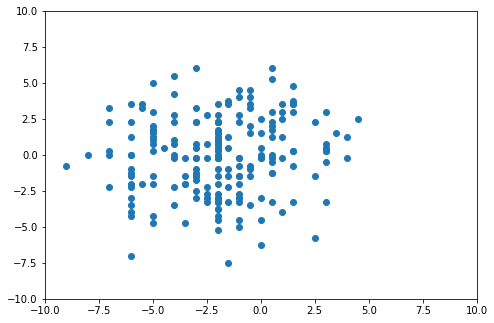

In [192]:
# plot all the results
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(results[:,0], results[:,1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
fig.show()

In [208]:
answers = answers.values
answers = answers.astype(int)
results = results.astype(float)
# reserve 20 trials as testing data
CUTOFF = answers.shape[0]-20
train_ans, train_res = answers[:CUTOFF], results[:CUTOFF]
test_ans, test_res = answers[CUTOFF:], results[CUTOFF:]
# load the data as answers-results tuples
train_dataset = list(zip(torch.from_numpy(train_ans), torch.from_numpy(train_res)))
test_dataset = list(zip(torch.from_numpy(test_ans), torch.from_numpy(test_res)))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1)

In [194]:
model = MultiLayerPerceptron(answers.shape[1], results.shape[1])
optimizer = optim.SGD(model.parameters(), lr=1e-4)
criterion = nn.L1Loss()
losses = []
EPOCHS = 5000
for epoch in range(EPOCHS):
    loss = 0
    for ans, res in train_loader:
        ans, res = ans.float(), res.float()
        optimizer.zero_grad()
        pred_res = model(ans)
        train_loss = criterion(pred_res, res)
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
    losses.append(loss)
    if (epoch+1)%100==0:
        print(f'epoch: {epoch+1}/{EPOCHS}, loss: {loss}')

epoch: 100/5000, loss: 323.78666051477194
epoch: 200/5000, loss: 275.7347574084997
epoch: 300/5000, loss: 232.42308221012354
epoch: 400/5000, loss: 193.8779852092266
epoch: 500/5000, loss: 160.1671530753374
epoch: 600/5000, loss: 133.08720287680626
epoch: 700/5000, loss: 111.87341132760048
epoch: 800/5000, loss: 94.95849668979645
epoch: 900/5000, loss: 82.04922117292881
epoch: 1000/5000, loss: 71.86262175440788
epoch: 1100/5000, loss: 63.33379980921745
epoch: 1200/5000, loss: 55.74119721353054
epoch: 1300/5000, loss: 49.61146466434002
epoch: 1400/5000, loss: 44.32188496738672
epoch: 1500/5000, loss: 39.474871069192886
epoch: 1600/5000, loss: 35.11512479186058
epoch: 1700/5000, loss: 31.43549381196499
epoch: 1800/5000, loss: 28.407904282212257
epoch: 1900/5000, loss: 25.645548313856125
epoch: 2000/5000, loss: 23.142719477415085
epoch: 2100/5000, loss: 21.233643293380737
epoch: 2200/5000, loss: 19.631436124444008
epoch: 2300/5000, loss: 18.280695259571075
epoch: 2400/5000, loss: 17.07504

In [201]:
for ans, res in test_loader:
    ans, res = ans.float(), res.float()
    pred_res = model(ans)
    loss = criterion(pred_res, res)
    print(f'loss: {loss}')

loss: 0.007091403007507324
loss: 0.00437086820602417
loss: 0.0019140243530273438
loss: 0.008213460445404053
loss: 0.0006968975067138672
loss: 0.011926651000976562
loss: 0.008230924606323242
loss: 0.024091482162475586
loss: 0.010897994041442871
loss: 0.02990555763244629
loss: 0.004840373992919922
loss: 0.0089053213596344
loss: 0.0007698535919189453
loss: 0.004900157451629639
loss: 0.012239038944244385
loss: 0.0023698806762695312
loss: 0.0030102431774139404
loss: 0.01361885666847229
loss: 0.0023505985736846924
loss: 0.026133060455322266


In [202]:
params = list(model.parameters())
params

[Parameter containing:
 tensor([[-2.3349e-02, -2.3423e-02, -2.3262e-02, -2.3604e-02, -2.2929e-02,
          -5.2216e-02, -5.2050e-02, -5.2442e-02, -5.2282e-02, -5.2251e-02,
          -7.2468e-03, -7.0283e-03, -7.2110e-03, -7.2560e-03, -7.4131e-03,
          -6.5024e-03, -6.5759e-03, -6.4053e-03, -6.0158e-03, -6.6024e-03,
          -4.7783e-02, -4.7619e-02, -4.7764e-02, -4.7689e-02, -4.8052e-02,
           6.6789e-03,  6.8074e-03,  6.7140e-03,  6.5768e-03,  6.8124e-03,
          -3.7346e-02, -3.7337e-02, -7.1837e-02, -7.2086e-02, -2.5558e-02,
          -2.5704e-02, -2.5494e-02, -2.5577e-02, -2.5393e-02, -2.1763e-02,
          -2.1686e-02, -2.1623e-02, -2.2046e-02, -2.1704e-02, -7.1340e-02,
          -7.1501e-02, -3.7624e-02, -3.7656e-02, -3.7887e-02, -3.8007e-02,
          -3.7934e-02, -4.7289e-02, -4.7381e-02, -4.6930e-02, -4.6892e-02,
          -4.6537e-02, -7.5326e-02, -7.6127e-02, -2.1967e-02, -2.2317e-02,
          -2.2618e-02, -2.2185e-02, -2.2704e-02,  2.0494e-03,  1.8214e-03,
  

In [203]:
x_weights = params[0][0].detach()
columns = pd.get_dummies(data[data.columns[:-2]]).columns
x_weights = pd.DataFrame(np.array([x_weights.numpy()]), columns=columns)
# observe from the .csv files that X is always in increments of 0.5
x_weights = x_weights.applymap(lambda val: round(val*2)/2)
x_weights

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
y_weights = params[0][1].detach()
y_weights = pd.DataFrame(np.array([y_weights.numpy()]), columns=columns)
# observe from the .csv files that Y is always in increments of 0.25
y_weights = y_weights.applymap(lambda val: round(val*4)/4)
y_weights

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
0,0.0,1.0,-1.0,-0.25,0.25,0.0,1.0,-1.0,-0.25,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [256]:
all_weights = pd.concat([x_weights, y_weights], ignore_index=True)
all_weights.index = ['X','Y']
all_weights.to_csv('weights.csv')
all_weights

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,How many friends and colleagues do you currently have?_43,Rate your life right now._51,Rate your life right now._52,Rate your life right now._53,Rate your life right now._54,Which climate do you live in?_dry,Which climate do you live in?_mild,Which climate do you live in?_polar,Which climate do you live in?_snow,Which climate do you live in?_tropical
X,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Y,0.0,1.0,-1.0,-0.25,0.25,0.0,1.0,-1.0,-0.25,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
# see the losses after rounding the weights
x_tensor = torch.from_numpy(x_weights.values).float()
y_tensor = torch.from_numpy(y_weights.values).float()
for ans, res in test_loader:
    ans, res = ans.float(), res.float()
    pred_res = torch.from_numpy(np.array([[(ans@x_tensor.T).item()-2,(ans@y_tensor.T).item()-0.25]]))
    loss = criterion(pred_res, res)
    print(f'loss: {loss}')

loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0
loss: 0.0


In [257]:
from collections import OrderedDict
model.load_state_dict(OrderedDict({'layer.weight': torch.from_numpy(np.array([x_tensor.numpy().flatten(), y_tensor.numpy().flatten()]))}), strict=False)
torch.save(model.state_dict(), 'model.pt')

In [262]:
for ans, res in test_loader:
    ans, res = ans.float(), res.float()
    pred_res = model(ans)
    loss = criterion(pred_res, res)
    print(f'predicted: {pred_res.detach().numpy().flatten()}, actual: {res.detach().numpy().flatten()}, loss: {loss}')
    print(f'diff: {res.detach().numpy().flatten()-pred_res.detach().numpy().flatten()}')


predicted: [-2.  1.], actual: [-4.    0.75], loss: 1.125
diff: [-2.   -0.25]
predicted: [0.5  3.75], actual: [-1.5  3.5], loss: 1.125
diff: [-2.   -0.25]
predicted: [-2.  3.], actual: [-4.    2.75], loss: 1.125
diff: [-2.   -0.25]
predicted: [0.   3.75], actual: [-2.   3.5], loss: 1.125
diff: [-2.   -0.25]
predicted: [-2. -2.], actual: [-4.   -2.25], loss: 1.125
diff: [-2.   -0.25]
predicted: [0.   1.25], actual: [-2.  1.], loss: 1.125
diff: [-2.   -0.25]
predicted: [-2.    1.25], actual: [-4.  1.], loss: 1.125
diff: [-2.   -0.25]
predicted: [-3. -4.], actual: [-5.   -4.25], loss: 1.125
diff: [-2.   -0.25]
predicted: [-4.   2.5], actual: [-6.    2.25], loss: 1.125
diff: [-2.   -0.25]
predicted: [2.5 2.5], actual: [0.5  2.25], loss: 1.125
diff: [-2.   -0.25]
predicted: [3.5 4. ], actual: [1.5  3.75], loss: 1.125
diff: [-2.   -0.25]
predicted: [ 0. -3.], actual: [-2.   -3.25], loss: 1.125
diff: [-2.   -0.25]
predicted: [1.5 3.5], actual: [-0.5   3.25], loss: 1.125
diff: [-2.   -0.25]
pre

In [221]:
from itertools import product
# answers that affect X
nz_x = x_weights.loc[:,x_weights.any()]
yn_ls = []
for i in range(0,18,2):
    # answers to yes-no questions
    yn_ls.append([nz_x.iloc[:,i].item(), nz_x.iloc[:,i+1].item()])
# bio sex
yn_ls.append([nz_x.iloc[:,18].item(), nz_x.iloc[:,19].item(), nz_x.iloc[:,20].item()])
score_to_combs = dict(zip(np.arange(-10,11,0.5),[[] for i in range(41)]))
for comb in product(*yn_ls):
    score_to_combs[sum(comb)-2].append(comb)
score_to_combs
# higher values of X are definitely possible

{-10.0: [(-1.0, -1.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.0, -2.0)],
 -9.5: [],
 -9.0: [(-1.0, -1.0, -0.5, 0.5, -0.5, -0.5, -0.5, -0.5, -1.0, -2.0),
  (-1.0, -1.0, -0.5, -0.5, -0.5, -0.5, -0.5, 0.5, -1.0, -2.0),
  (-1.0, -1.0, -0.5, -0.5, -0.5, -0.5, 0.5, -0.5, -1.0, -2.0),
  (-1.0, -1.0, -0.5, -0.5, -0.5, 0.5, -0.5, -0.5, -1.0, -2.0),
  (-1.0, -1.0, -0.5, -0.5, 0.5, -0.5, -0.5, -0.5, -1.0, -2.0),
  (-1.0, -1.0, 0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.0, -2.0)],
 -8.5: [],
 -8.0: [(1.0, -1.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.0, -2.0),
  (-1.0, -1.0, -0.5, 0.5, -0.5, -0.5, -0.5, 0.5, -1.0, -2.0),
  (-1.0, -1.0, -0.5, 0.5, -0.5, -0.5, 0.5, -0.5, -1.0, -2.0),
  (-1.0, -1.0, -0.5, 0.5, -0.5, 0.5, -0.5, -0.5, -1.0, -2.0),
  (-1.0, -1.0, -0.5, 0.5, 0.5, -0.5, -0.5, -0.5, -1.0, -2.0),
  (-1.0, -1.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 1.0, -2.0),
  (-1.0, -1.0, -0.5, -0.5, -0.5, -0.5, 0.5, 0.5, -1.0, -2.0),
  (-1.0, -1.0, -0.5, -0.5, -0.5, 0.5, -0.5, 0.5, -1.0, -2.0),
  (-1.0, -1.0, -0

In [260]:
print(f'min X: {min(results[:,0])}')
print(f'max X: {max(results[:,0])}')
print(f'min Y: {min(results[:,1])}')
print(f'max Y: {max(results[:,1])}')

min X: -9.0
max X: 4.5
min Y: -7.5
max Y: 6.0


In [279]:
# Let's get data outside of these ranges and pay close attention to the stats questions
stats_combs = []
for i in range(-9,-3):
    stats_combs.append(pd.unique(data.iloc[:,i]))
stats_combs
# product(*stats_combs)
# for comb in product(*stats_combs):
#     print(comb)

[array(['othersex', 'male', 'female'], dtype=object),
 array(['11', '12', '14', '15', '13'], dtype=object),
 array(['23', '21', '22', '24'], dtype=object),
 array(['34', '32', '33', '31'], dtype=object),
 array(['43', '41', '42'], dtype=object),
 array(['53', '54', '52', '51'], dtype=object)]